In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/train.csv", na_values=["na", "N/a", np.nan,"NA"] )

In [ ]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


To do:

handle missing values

In [ ]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [ ]:
print_full(df.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
df.shape

(1460, 81)

In [ ]:
1460*0.40

584.0

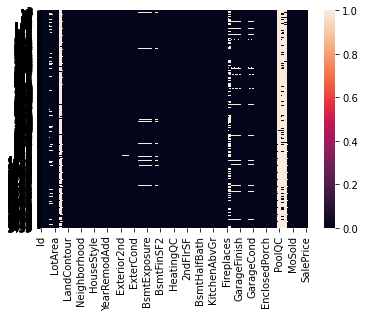

In [ ]:
sns.heatmap(df.isnull(), yticklabels=True)

In [ ]:
def clean_data(x, threshold):
  df = x.copy()
  per = df.shape[0]*threshold
  print(per)
  col = df.columns
  to_drop = list()
  for i in range(df.shape[1]):
    
    if(df.iloc[:,i].dtype == np.object):
      
      
      if( float(df.iloc[:,i].isnull().sum()) >= per ):
        to_drop.append(col[i])
      
      else:
        df.iloc[:,i].fillna(value=df.iloc[:,i].mode()[0], inplace=True)

    else:
      if(df.iloc[:,i].isnull().sum() >= per ):
        to_drop.append(col[i])
        
      else:
        df.iloc[:,i].fillna(value=df.iloc[:,i].mean(), inplace=True)

  return df,to_drop




In [ ]:
train_df , to_drop = clean_data(df,0.4)

584.0


In [ ]:
to_drop

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [ ]:
train_df.drop(to_drop, axis=1, inplace=True)

In [ ]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


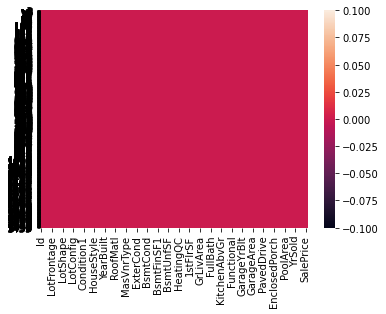

In [ ]:
sns.heatmap(new_df.isnull(), yticklabels=True)

In [ ]:
new_df.to_csv("intermediate_T1.csv",index=False)

#same preprocess for test

In [ ]:
test = pd.read_csv("/content/test.csv")

In [ ]:
test_df, to_drop1 = clean_data(test, .4)

583.6


In [ ]:
to_drop  =['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [ ]:
to_drop1

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [ ]:
test_df.drop(to_drop1,axis=1,inplace=True)

In [ ]:
test_df.to_csv("/content/intermediate_test.csv", index=False)

##For verification: whether train and test have same features or not

In [ ]:
l1 = list(train_df.columns)
l2 = list(test_df.columns)

In [ ]:
for i in range(len(l2)):
  if(l1[i]!=l2[i]):
    print(l1[i],l2[i]) 

#encoding:

In [ ]:
X = train_df.iloc[:,:-1].values

In [ ]:
X

array([[1, 60, 'RL', ..., 2008, 'WD', 'Normal'],
       [2, 20, 'RL', ..., 2007, 'WD', 'Normal'],
       [3, 60, 'RL', ..., 2008, 'WD', 'Normal'],
       ...,
       [1458, 70, 'RL', ..., 2010, 'WD', 'Normal'],
       [1459, 20, 'RL', ..., 2010, 'WD', 'Normal'],
       [1460, 20, 'RL', ..., 2008, 'WD', 'Normal']], dtype=object)

#getting indexes of categorical columns

In [ ]:
l = list()
for i in range(len(train_df.dtypes)):
  if(train_df.dtypes[i] == np.object):
    l.append(i)


In [ ]:
#NOT USED
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), l)], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 81kB 4.6MB/s 


In [ ]:
X = train_df.iloc[:,:-1].values
y = train_df.iloc[:,-1].values


In [ ]:
X

array([[1, 60, 'RL', ..., 2008, 'WD', 'Normal'],
       [2, 20, 'RL', ..., 2007, 'WD', 'Normal'],
       [3, 60, 'RL', ..., 2008, 'WD', 'Normal'],
       ...,
       [1458, 70, 'RL', ..., 2010, 'WD', 'Normal'],
       [1459, 20, 'RL', ..., 2010, 'WD', 'Normal'],
       [1460, 20, 'RL', ..., 2008, 'WD', 'Normal']], dtype=object)

In [ ]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [ ]:
X[:,l]

array([['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'IR1', ..., 'Y', 'WD', 'Normal'],
       ...,
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal']], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
X_train[:,l]

array([['RL', 'Pave', 'Reg', ..., 'N', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'N', 'WD', 'Normal'],
       ['RL', 'Pave', 'IR1', ..., 'Y', 'New', 'Partial'],
       ...,
       ['RM', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RM', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['C (all)', 'Grvl', 'Reg', ..., 'Y', 'ConLD', 'Normal']],
      dtype=object)

In [ ]:
from category_encoders import TargetEncoder

In [ ]:
#ecoding only the categorical columns
ec = TargetEncoder()
ec.fit(X_train[:,l],y_train)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


TargetEncoder(cols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                    17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=1.0, verbose=0)

In [ ]:
X_train[:,l] = ec.transform(X_train[:,l])
X_test[:,l] = ec.transform(X_test[:,l])

In [ ]:
print(X_train[0,:])

[922 90 192467.20819848974 67.0 8777 182411.88240343347 165995.77854195324
 181788.52521408183 182246.65209940018 178492.0732292917
 180966.72702702702 129115.0 146078.6769230769 182404.49177489177
 136290.18604651163 145049.37931034484 5 7 1900 2003 172359.8902305159
 181035.63469921536 148032.97674418605 148599.2380952381
 158230.83673469388 0.0 145363.7926657264 185471.4269005848
 151343.12525252526 140330.38175046555 182572.5779220779
 163862.11211340205 165125.99431818182 1084 183404.03636363638 0 188 1272
 183226.50087565675 158384.83425414364 187227.74131627058
 187874.52518656716 1272 928 0 2200 2 0 2 2 4 2 140823.41463414635 9
 184518.16575091574 0 194239.54755784062 1978.5061638868744
 138863.21739130435 0 0 183766.1009009009 184255.85587188613
 119782.08450704225 0 70 0 0 0 0 0 9 2008 174148.50592885376
 176411.80877742945]


#training the model (Random forest)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, max_depth=15, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_true = np.log(y_test)
y_p = np.log(y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_true, y_p)


In [ ]:
rmse

0.038870272235429645

In [ ]:
X_sub = test_df.iloc[:,:].values

In [ ]:
X_sub[:,l] = ec.transform(X_sub[:,l])

In [ ]:
X_sub

array([[1461, 20, 138995.1885877117, ..., 2010, 174148.50592885376,
        176411.80877742945],
       [1462, 20, 192467.20819848974, ..., 2010, 174148.50592885376,
        176411.80877742945],
       [1463, 60, 192467.20819848974, ..., 2010, 174148.50592885376,
        176411.80877742945],
       ...,
       [2917, 20, 192467.20819848974, ..., 2006, 174148.50592885376,
        140526.93902439025],
       [2918, 85, 192467.20819848974, ..., 2006, 174148.50592885376,
        176411.80877742945],
       [2919, 60, 192467.20819848974, ..., 2006, 174148.50592885376,
        176411.80877742945]], dtype=object)

In [ ]:
sample_sub = regressor.predict(X_sub)

In [ ]:
sample_sub

array([128600.42, 153168.84, 187159.4 , ..., 152906.66, 119038.5 ,
       210635.96])

In [ ]:
final = pd.DataFrame({"Id":test_df["Id"], "SalePrice": sample_sub})

In [ ]:
final.to_csv("/content/submission1.csv", index=False)